In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [4]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [5]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [6]:
print(data.test.labels[0])
print(data.test.labels[1])

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


In [7]:
test1=data.test.labels[0]
print(test1.argmax())

7


In [8]:
print([label.argmax() for label in data.test.labels])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [9]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [10]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

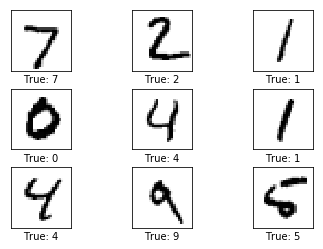

In [11]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [12]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, img_size_flat])

In [13]:
# correct answers will go here
Y_true = tf.placeholder(tf.float32, [None, num_classes])

In [14]:
Y_true_cls = tf.placeholder(tf.int64, [None])

In [15]:
# three layers and their number of neurons (tha last layer has 10 softmax neurons)

A = 200

B = 100

C = 60

In [16]:
# Weights initialised with small random values between -0.2 and +0.2

# When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10

W1 = tf.Variable(tf.truncated_normal([28*28, A] ,stddev=0.1)) #28*28=784
B1 = tf.Variable(tf.zeros([A]))

W2 = tf.Variable(tf.truncated_normal([A, B], stddev=0.1))
B2 = tf.Variable(tf.zeros([B]))

W3 = tf.Variable(tf.truncated_normal([B, C], stddev=0.1))
B3 = tf.Variable(tf.zeros([C]))

W4 = tf.Variable(tf.truncated_normal([C, 10], stddev=0.1))
B4 = tf.Variable(tf.zeros([10]))

In [18]:
# weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

In [19]:
# biases = tf.Variable(tf.zeros([num_classes]))

In [20]:
# logits = tf.matmul(x, weights) + biases

In [21]:
# y_pred = tf.nn.softmax(logits)

In [22]:
# y_pred_cls = tf.argmax(y_pred, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [17]:
# The model

XX = tf.reshape(X, [-1, 784])

Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)

Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)

Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)

# Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)

Ylogits = tf.matmul(Y3, W4) + B4

Y_pred = tf.nn.softmax(Ylogits)

Y_pred_cls = tf.argmax(Y_pred, dimension=1)
# Y_pred_cls = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Use the `axis` argument instead


In [23]:
# cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)

In [18]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images

# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability

# problems with log(0) which is NaN

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_true)
cost = tf.reduce_mean(cross_entropy)*100

In [24]:
# cost = tf.reduce_mean(cross_entropy)

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [26]:
# correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [27]:
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
# accuracy of the trained model, between 0 (worst) and 1 (best)

correct_prediction = tf.equal(Y_pred_cls, Y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [62]:
# session = tf.Session()

In [63]:
# session.run(tf.global_variables_initializer())

In [21]:
# init

init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

In [22]:
batch_size = 100

In [23]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # X_batch now holds a batch of images and
        # Y_true_batch are the true labels for those images.
        X_batch, Y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for Y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {X: X_batch,
                           Y_true: Y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        sess.run(optimizer, feed_dict=feed_dict_train)

In [24]:
feed_dict_test = {X: data.test.images,
                  Y_true: data.test.labels,
                  Y_true_cls: data.test.cls}

In [45]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))


In [26]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(Y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(Y_true=cls_true,
                          Y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [27]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = sess.run([correct_prediction, Y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [86]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
#     w = session.run(weights)
    
    allweights = tf.concat([tf.reshape(W1, [-1]), tf.reshape(W2, [-1]), tf.reshape(W3, [-1]), tf.reshape(W4, [-1])], 0)

    allbiases  = tf.concat([tf.reshape(B1, [-1]), tf.reshape(B2, [-1]), tf.reshape(B3, [-1]), tf.reshape(B4, [-1])], 0)
    
    w = session.run(allweights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [44]:
print_accuracy()

Accuracy on test-set: 9.6%
0.0958


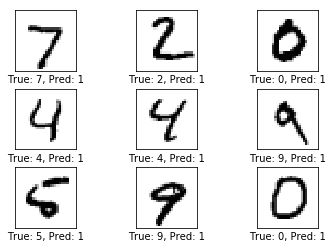

In [30]:
plot_example_errors()

In [28]:
optimize(num_iterations=1)

In [41]:
print_accuracy()

Accuracy on test-set: 9.6%


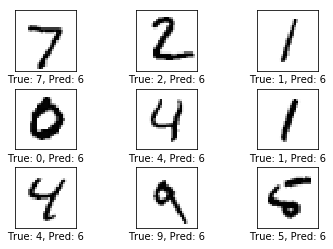

In [39]:
plot_example_errors()

IndexError: too many indices for array

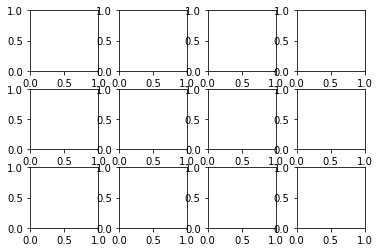

In [92]:
plot_weights()

In [37]:
optimize(num_iterations=25000)

In [42]:
print_accuracy()

Accuracy on test-set: 9.6%


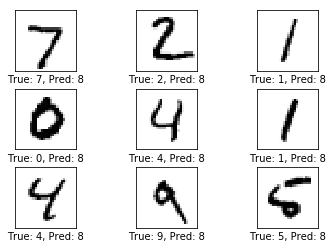

In [33]:
plot_example_errors()

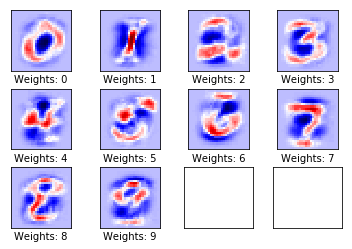

In [102]:
plot_weights()

In [34]:
optimize(num_iterations=990)

In [35]:
print_accuracy()

Accuracy on test-set: 11.3%


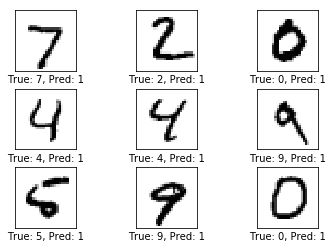

In [36]:
plot_example_errors()

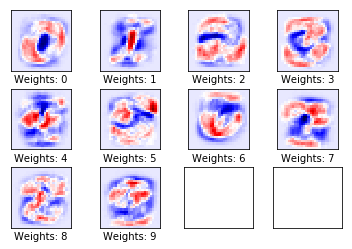

In [109]:
plot_weights()

[[ 966    0    1    1    0    4    4    1    3    0]
 [   0 1103    2    2    1    3    4    2   18    0]
 [  12    8  891   21   15    2   15   15   48    5]
 [   5    0   13  909    0   44    1   10   22    6]
 [   2    2    4    1  932    2    8    2    8   21]
 [  12    2    3   32    9  778   12    6   34    4]
 [  17    3    4    2   11   20  894    3    4    0]
 [   2    7   19    9    9    1    0  955    4   22]
 [   6    6    5   18   10   31    8   11  875    4]
 [  11    5    1   10   62   12    0   27   10  871]]


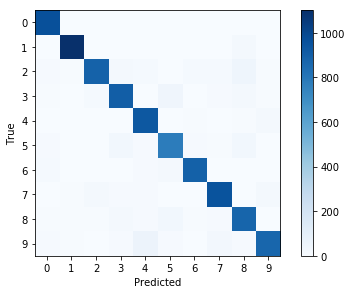

In [112]:
print_confusion_matrix()